# Problem 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
#make dataframe of auto-mpg.data 
mpg_file = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
mpg_df = pd.read_csv(mpg_file, delim_whitespace=True, names=column_names, header=None)
df = mpg_df.copy()
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# we need to consider only continious data. So drop some of the columns having non-continious data.
mpg_df = mpg_df.drop(['cylinders', 'year','origin','name'], axis = 1)
mpg_df

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
393,27.0,140.0,86.00,2790.0,15.6
394,44.0,97.0,52.00,2130.0,24.6
395,32.0,135.0,84.00,2295.0,11.6
396,28.0,120.0,79.00,2625.0,18.6


In [5]:
for name in mpg_df.columns.values:
    ques_index = mpg_df[mpg_df[name] =='?'].index
    nan_index = mpg_df[mpg_df[name] == np.nan].index
    print(name)
    print('Number of NaN values = {}'.format(len(nan_index.tolist())))
    print('Number of ? values = {}'.format(len(ques_index.tolist())))
    print('\n')

mpg
Number of NaN values = 0
Number of ? values = 0


displacement
Number of NaN values = 0
Number of ? values = 0


horsepower
Number of NaN values = 0
Number of ? values = 6


weight
Number of NaN values = 0
Number of ? values = 0


acceleration
Number of NaN values = 0
Number of ? values = 0




C:\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Total 6 rows have missing values (?) in horsepower column 

In [6]:
horsepower_missing_index = mpg_df[mpg_df.horsepower=='?'].index
mpg_df.loc[horsepower_missing_index]

,mpg,displacement,horsepower,weight,acceleration
32,25.0,98.0,?,2046.0,19.0
126,21.0,200.0,?,2875.0,17.0
330,40.9,85.0,?,1835.0,17.3
336,23.6,140.0,?,2905.0,14.3
354,34.5,100.0,?,2320.0,15.8
374,23.0,151.0,?,3035.0,20.5


In [7]:
mpg_df.loc[horsepower_missing_index, 'horsepower'] = np.nan
mpg_df.loc[mpg_df.horsepower.isnull()]

,mpg,displacement,horsepower,weight,acceleration
32,25.0,98.0,NaN,2046.0,19.0
126,21.0,200.0,NaN,2875.0,17.0
330,40.9,85.0,NaN,1835.0,17.3
336,23.6,140.0,NaN,2905.0,14.3
354,34.5,100.0,NaN,2320.0,15.8
374,23.0,151.0,NaN,3035.0,20.5


In [8]:
# Change horsepower datatype from object to float
mpg_df.horsepower = mpg_df.horsepower.apply(pd.to_numeric)
mpg_df.dtypes

mpg             float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
dtype: object

In [9]:
#impute mean value of the horsepower column in place of NaN
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(mpg_df)
mpg_df[mpg_df.columns] = imp_mean.fit_transform(mpg_df)

In [10]:
mpg_df.describe()

,mpg,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090
std,7.815984,104.269838,38.199187,846.841774,2.757689
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000
50%,23.000000,148.500000,95.000000,2803.500000,15.500000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [11]:
# Missing values(?) successfully replace with the mean value of the column.  
mpg_df.loc[32]

mpg               25.000000
displacement      98.000000
horsepower       104.469388
weight          2046.000000
acceleration      19.000000
Name: 32, dtype: float64

In [12]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [13]:
clustering = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean').fit(mpg_df)
print(clustering.labels_)

[2 2 2 2 2 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 2 2 0
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 0 2 1
 1 1 0 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 1 1 1 1 2 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 0 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 2 1 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 1 1 2 2 0 0 0 0 0 2
 1 1 1 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 2
 0 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 1 1 2 2 0 0 0
 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


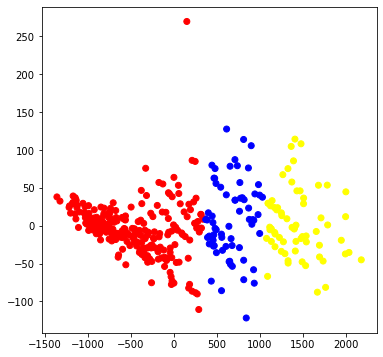

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

colormap = np.array(['red', 'yellow', 'blue'])

pca_col = PCA(2).fit_transform(mpg_df)
plt.figure(figsize =(6, 6))
plt.scatter(x=pca_col[:,0],
            y=pca_col[:,1],
            c=colormap[clustering.labels_])

plt.show()

In [15]:
#To find mean and variance of each cluster, let's place the Cluster labels and origin into the dataframe.
mpg_df['cluster'] = clustering.labels_
mpg_df['origin'] = df['origin']
mpg_df.describe()

,mpg,displacement,horsepower,weight,acceleration,cluster,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,104.469388,2970.424623,15.568090,0.502513,1.572864
std,7.815984,104.269838,38.199187,846.841774,2.757689,0.770190,0.802055
min,9.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,1.000000
25%,17.500000,104.250000,76.000000,2223.750000,13.825000,0.000000,1.000000
50%,23.000000,148.500000,95.000000,2803.500000,15.500000,0.000000,1.000000
75%,29.000000,262.000000,125.000000,3608.000000,17.175000,1.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,2.000000,3.000000


In [16]:
grouped_by_origin = mpg_df[["mpg", "displacement", "horsepower", "weight", "acceleration", "origin"]].groupby(by=["origin"])
grouped_by_cluster = mpg_df[["mpg", "displacement", "horsepower", "weight", "acceleration", "cluster"]].groupby(by=["cluster"])

In [17]:
print("MEAN BY CLASS ORIGIN")
print(grouped_by_origin.mean())
print("\nMEAN BY CLUSTER Labels")
print(grouped_by_cluster.mean())

MEAN BY CLASS ORIGIN
              mpg  displacement  horsepower       weight  acceleration
origin                                                                
1       20.083534    245.901606  118.814769  3361.931727     15.033735
2       27.891429    109.142857   81.241983  2423.300000     16.787143
3       30.450633    102.708861   79.835443  2221.227848     16.172152

MEAN BY CLUSTER Labels
               mpg  displacement  horsepower       weight  acceleration
cluster                                                                
0        27.365414    131.934211   84.300061  2459.511278     16.298120
1        13.889062    358.093750  167.046875  4398.593750     13.025000
2        17.510294    278.985294  124.470588  3624.838235     15.105882


We can see that the mean for each feature when grouped by Origin and Cluster ID, doesn't show too much insight but the mean acceleration between clusters and origin classes are very close to each other, compared to the other features and we can pretty much consider it as noise.

In [18]:
print("VARIANCE BY CLASS ORIGIN")
print(grouped_by_origin.var())
print("\nVARIANCE BY CLUSTER ID")
print(grouped_by_cluster.var())

VARIANCE BY CLASS ORIGIN
              mpg  displacement   horsepower         weight  acceleration
origin                                                                   
1       40.997026   9702.612255  1569.532304  631695.128385      7.568615
2       45.211230    509.950311   410.659789  240142.328986      9.276209
3       37.088685    535.465433   317.523856  102718.485881      3.821779

VARIANCE BY CLUSTER ID
               mpg  displacement  horsepower         weight  acceleration
cluster                                                                  
0        41.976309   2828.083391  369.143491  182632.099872      5.718298
1         3.359085   2138.213294  756.521577   74312.340278      3.591429
2         8.829892   2882.492318  713.088674   37775.809263     10.556980


We can see that there is low variance in clusters 1 and 2 for mpg, and this shows that it was probably a strong factor in splitting between cluster 0 and clusters 1 and 2. Again we see little variation in acceleration accross all clusters and origin classes, and can call it noise.

In [19]:
both = zip(mpg_df['cluster'], mpg_df['origin'])

categories = {
    0:[],
    1:[],
    2:[]
}
for lbl, orgn in both:
    categories[lbl].append(orgn)

print(" Origin:", "1".ljust(3), "2".ljust(3), "3".ljust(3))
print("-------------------")
print("Class 0:", str(categories[0].count(1)).ljust(3), str(categories[0].count(2)).ljust(3), str(categories[0].count(3)).ljust(3))
print("Class 1:", str(categories[1].count(1)).ljust(3), str(categories[1].count(2)).ljust(3), str(categories[1].count(3)).ljust(3))
print("Class 2:", str(categories[2].count(1)).ljust(3), str(categories[2].count(2)).ljust(3), str(categories[2].count(3)).ljust(3))

 Origin: 1   2   3  
-------------------
Class 0: 120 67  79 
Class 1: 64  0   0  
Class 2: 65  3   0  


- We can see that by choosing 3 clusters, we do not neccesarily get 3 distinct clusters that match up 1 to 1 with the target class variable origin.
- However we can clearly see that almost every object that belonged to either Origin 2 or 3, belongs to class 0.
- This means Clusters 1 and 2 were probably sub-clusters that contained points that did not have attributes that would most likely lead to it of having origin 2 or 3

# Problem 2

In [20]:
from sklearn import datasets
from sklearn import preprocessing

boston = datasets.load_boston()

In [21]:
boston_df = pd.DataFrame(data=boston.data,
                  columns=boston.feature_names)
boston_df_scaled = pd.DataFrame(data=preprocessing.scale(boston.data),
                         columns=boston.feature_names)

In [22]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [23]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [24]:
boston_df_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [25]:
boston_df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


n_cluster = 2
Silhouette score = 0.36011768587358606


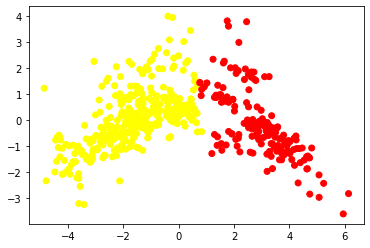

n_cluster = 3
Silhouette score = 0.2574894522739469


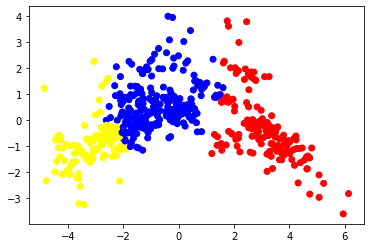

n_cluster = 4
Silhouette score = 0.28812346566702973


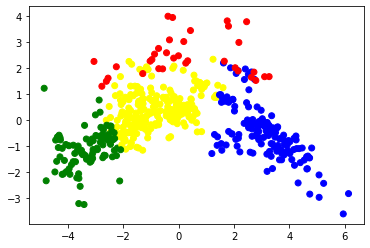

n_cluster = 5
Silhouette score = 0.24783915229552517


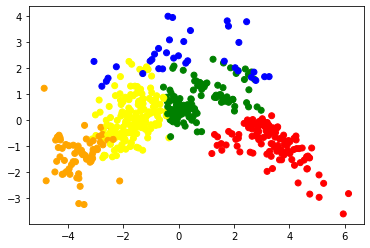

n_cluster = 6
Silhouette score = 0.27182544582916907


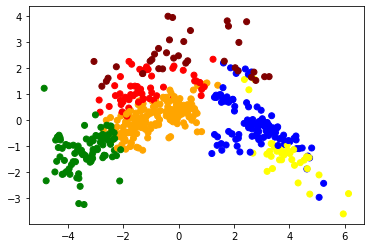

In [26]:
# K-Means analysis on scaled data and Silhouette score, with the number of clusters ranging from 2 to 6.
from sklearn.cluster import KMeans
from sklearn import metrics

colormap = np.array(['red', 'yellow', 'blue', 'green', 'orange', 'maroon'])

for x in range(2, 7):
    clust_model = KMeans(n_clusters=x,
                     init='k-means++')
    clust_labels = clust_model.fit_predict(boston_df_scaled)
    pca_col = PCA(2).fit_transform(boston_df_scaled)
    plt.scatter(x=pca_col[:,0],
                y=pca_col[:,1],
                c=colormap[clust_labels])
    print('n_cluster = {}'.format(x))
    silhouette_avg = metrics.silhouette_score(boston_df_scaled,
                                              clust_labels)

    print('Silhouette score = {}'.format(silhouette_avg))
    plt.show()

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Since the highest Silhouette score was when n_clusters = 2, it is the optimal k because it poorly matched to neighboring clusters.

In [27]:
#Redo the cluster with n_clusters = 2 to calucate the mean of all values
clust_model = KMeans(n_clusters=2,
                     init='k-means++')
clust_labels = clust_model.fit_predict(boston_df_scaled)
print(clust_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [28]:
#Add the cluster labels to the boston_df_scaled data frame
boston_df_scaled['cluster'] = clust_labels
boston_df_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,0.349802
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.477379
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,0.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,0.000000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,0.000000
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,1.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,1.000000


In [29]:
print("CENTROID COORDINATES:\n\n",clust_model.cluster_centers_)
print("\nMEAN FOR EACH FEATURE BY CLUSTER:")
boston_df_scaled.groupby(by="cluster").mean()

CENTROID COORDINATES:

 [[-0.39012396  0.26239167 -0.62036759  0.00291182 -0.58467512  0.24331476
  -0.43510819  0.45722226 -0.58380115 -0.63145993 -0.28580826  0.32645106
  -0.44642061]
 [ 0.72514566 -0.48772236  1.15311264 -0.00541237  1.086769   -0.45226302
   0.80876041 -0.8498651   1.0851445   1.1737306   0.53124811 -0.60679321
   0.82978746]]

MEAN FOR EACH FEATURE BY CLUSTER:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cluster,,,,,,,,,,,,,
0,-0.390124,0.262392,-0.620368,0.002912,-0.584675,0.243315,-0.435108,0.457222,-0.583801,-0.631460,-0.285808,0.326451,-0.446421
1,0.725146,-0.487722,1.153113,-0.005412,1.086769,-0.452263,0.808760,-0.849865,1.085145,1.173731,0.531248,-0.606793,0.829787


The means for each each feature of all clusters are actually the same as the centroid coordinates.

# Problem 3

In [30]:
wine = datasets.load_wine()

In [31]:
wine_df = pd.DataFrame(wine.data, columns= wine.feature_names)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(wine_df)
wine_df_scaled = pd.DataFrame(scaler.transform(wine_df), columns = wine.feature_names)

In [33]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [34]:
wine_df_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [35]:
c_model = KMeans(n_clusters=3)
c_labels = c_model.fit_predict(wine_df_scaled)
print(c_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
print("homogeneity score:",metrics.homogeneity_score(c_labels, wine.target))
print("completeness score:",metrics.completeness_score(c_labels, wine.target))

homogeneity score: 0.8729636016078731
completeness score: 0.8788432003662366
